# **자연어(텍스트) 데이터 전처리**

* **말뭉치 또는 코퍼스(영어: corpus, 복수형: corpora)**는 자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합
* 주어진 코퍼스에서 **토큰(token)**이라 불리는 단위로 나누는 작업을 토큰화
(tokenization)라고 함
* 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의함
* 토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 함. 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주함.

***Keywords***
*   **정규 표현식**: 자연어 데이터 정제를 위해 사용
*   **람다 함수**

### **정규식표현식(Regular Expression; Regex)**
*    **특정한 규칙을 가진 문자열의 집합을 표현하는 데 사용하는 형식 언어**
*   정규 표현식에서 사용하는 메타 문자(meta characters)에는 다음과 같은 것이 있다.<br> ※ 메타 문자란 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자를 말한다. <br>

<b>메타문자: . ^ $ * + ? { } [ ] \ | ( ) </b>

*   **[  ]** : **문자 클래스**([ ]) 사이의 문자들과 매치
*    &#45; : 하이픈(-)을 사용하면 두 문자 사이의 범위(From - To)를 의미
*    &#43; : 1번 이상 반복<br>
※   문자 클래스([ ]) 안에는 어떤 문자나 메타 문자도 사용할수 있지만 주의해야 할 메타 문자가 1가지 있다. 그것은 바로 ^인데, **문자 클래스 안에 ^ 메타 문자를 사용할 경우에는 반대(not)라는 의미**를 갖는다. 

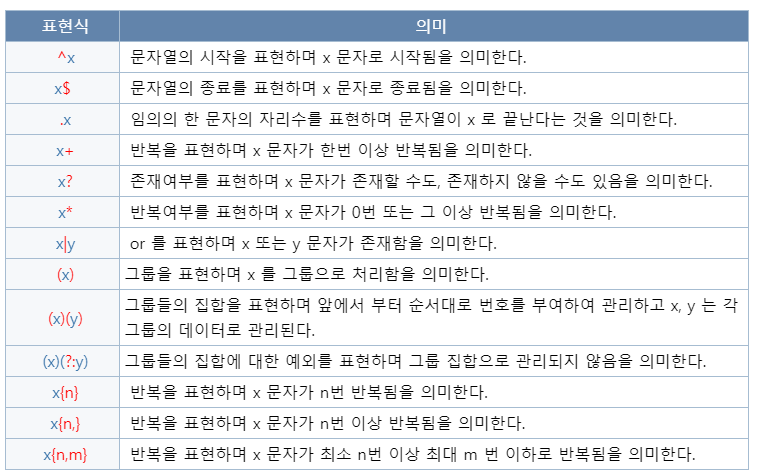

*  [abck] : a or b or c or k
*  [a-d] : -와 함께 사용되면 해당 문자 사이의 범위에 속하는 문자 중 하나
*  [^가-힣]: (한글)-와 함께 사용되면 해당 문자 사이의 범위에 속하는 문자 중 하나
*  [0-9] : 모든 숫자
*  [a-z] : 모든 소문자
*  [A-Z] : 모든 대문자
*  [a-zA-Z0-9] : 모든 알파벳 문자 및 숫자
*  [^0-9] : ^가 맨 앞에 사용 되는 경우 해당 문자 패턴이 아닌 것과 매칭
*  [^\w]
*  [^\W]

###**원하는 문자만 남기고 제거하기**
**re.sub（ 검색 패턴을 지정, 변경할 내용, 원본 )**

*   정규 표현식: **검색 패턴을 지정**
*   대상 문자열: 검색 대상이 되는 문자열(**변경할 내용**)
*   치환 문자열: 변경하고 싶은 문자열(**원본**)

In [1]:
import re
text = '?>!Hello1234'
text_mod = re.sub('[^a-zA-Z]+', " ", text)
text_mod

' Hello '

In [4]:
text = "11%2&로 신고하세요"
text_mod = re.sub('[^\w]+', " ", text) # wildcard
text_mod

'11 2 로 신고하세요'

In [5]:
text = "숭실대학교,            박재완입니다! "
text_mod = re.sub('[^가-힣]+', " ",text) # 가부터 힣까지 : 한글 전체, 안에서 한글이 아닌것은 전부다 공백으로 바꾸어라
text_mod

'숭실대학교 박재완입니다 '

In [6]:
text = "010-1234-5678 박"

text_mod = re.sub('^[0-9]{3}-[0-9]{4}-[0-9]{4}',"***-****-****",text) 
text_mod

'***-****-**** 박'

# **한국어 빈도 분석**

### **형태소 분리**<br>
*   형태소: 의미를 가진 최소의 단위 (minimally meaningful unit)
*   단어(또는 어절)를 구성하는 각 형태소 분리

### **KoNLPy(한국어 자연어 처리 파이썬 패키지) 설치**
1.   Java JDK (https://www.oracle.com/java/technologies/downloads/#jdk17-windows) 설치
2.   JAVA_HOME 설정: 시스템 환경 변수 편집 : 환경 변수 > 시스템 변수 > 새로 만들기
  *  변수 이름: JAVA_HOME
  *  변수 값: C:\Program Files\Java\jdk-17.0.3
3. JPype1 설치: 
  *  https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 자신의 파이썬 버전에 맞게 다운로드 그리고 파일을 작업 환경에 이동
  *  pip install JPype1...
4. pip install konlpy

### **한국어 빈도 분석 예**

In [1]:
!pip install konlpy # 한국어 형태소 분리 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 539 kB/s 
     |████████████████████████████████| 453 kB 48.4 MB/s 


In [2]:
import json
import re
from konlpy.tag import Okt
from collections import Counter # 개수 세어주는 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # matplotlib에서 한글 깨짐 문제 해결
from wordcloud import WordCloud # 시각화 라이브러리 중 하나

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataOpen = open('/content/drive/MyDrive/DataScience/DataFile/korean_text.json', encoding='utf-8').read()
data = json.loads(dataOpen)

In [7]:
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [9]:
message = ''
# 핵심 알고리즘
for n in data:
    print(n['message'])
    message = message + re.sub('[^가-힣]', ' ', n['message'])+' '

6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"

스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.

6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.
로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.
4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...
공통 간판 공약은 '4차 산업혁명 선도 도시 구현'과 '가상화폐·블록체인 기술 활용' 등입니다. https://goo.gl/qPEyAJ
이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇, 빅데이터 산업 흐름을 알려줍니다. #인공지능 #최고위과정 #산학연최고전문가 https://goo.gl/jSZSNX
4차 산업혁명 모든 기술과 서비스 구현
산업혁명의 나라, 영국엔 4차 산업혁명이 없다?
한국-영국 경험과 지혜를 모으는 ‘미래비즈니스포럼 2017’ 개최
[전자신문TV 라이브] SBA 신직업위크

4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원(SBA)이 자신들의 역량과 노력을 모두 담은 '제 2회 신직업위크'를 진행하고 있습니다.

이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석, 윤석원 테스트웍스 대표 등과 함께 '제 2회 신직업위크'와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다. 많은 시청 바랍니다. 

#전자신문 #전자신문엔터 #전자신문TV #라이브 #소셜방송 #현장라이브 #손보련 #신직업위크 #서울산업진흥원 #SBA #신직업 #서울 #강만구 #서지윤 #윤석원 #테스트웍스 #소프트웨

In [10]:
message

' 월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다    월의 스파크포럼에서는  차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다  로봇이  차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다   차 산업혁명 시대 금융 산업 전반 점검해야 한다는    공통 간판 공약은   차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다                        이번 과정은  차 산업혁명 핵심 기술인   에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가                        차 산업혁명 모든 기술과 서비스 구현 산업혁명의 나라  영국엔  차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼       개최  전자신문   라이브      신직업위크   차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원     이 자신들의 역량과 노력을 모두 담은  제  회 신직업위크 를 진행하고 있습니다   이번 전자신문  라이브는 서울 대치동     신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제  회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문    라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원       신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트

In [11]:
nlp = Okt() # 객체 생성
messageNouns = nlp.nouns(message)
messageNouns 

['월',
 '스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '월',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '구현',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 

In [12]:
count = Counter(messageNouns)
count

Counter({'가상': 1,
         '가상현실': 1,
         '가장': 2,
         '간판': 1,
         '강': 2,
         '강남구': 1,
         '강연': 1,
         '강의': 1,
         '강점': 1,
         '강조': 1,
         '강추': 1,
         '개념': 1,
         '개막': 1,
         '개최': 1,
         '개편': 1,
         '개혁': 1,
         '거리': 1,
         '격인': 1,
         '경쟁력': 2,
         '경제': 1,
         '경험': 1,
         '공공기관': 2,
         '공무원': 1,
         '공약': 1,
         '공통': 1,
         '과': 1,
         '과정': 2,
         '과제': 2,
         '과학기술': 1,
         '관련': 1,
         '관심': 1,
         '광운대': 1,
         '교수': 1,
         '교육': 2,
         '교차': 1,
         '구글': 1,
         '구현': 2,
         '국내': 2,
         '국면': 1,
         '국정': 2,
         '그': 1,
         '금융': 1,
         '급': 1,
         '기대': 1,
         '기술': 8,
         '기업': 3,
         '꼽': 1,
         '나라': 1,
         '노력': 3,
         '논의': 1,
         '다림': 1,
         '다보스': 1,
         '대비': 2,
         '대선': 1,
         '대응': 3,
    

In [13]:
# 람다 함수 : 이름이 없는 함수
# parameter : return value
# ==============
# def addOne(x):
#   return x[1]
# ==============
# lambda x: x[1]

In [14]:
# why? : 튜플 인덱싱이 가능하기 때문에 속도 면에서 빠르다
# 시험출제
count.items()

dict_items([('월', 2), ('스파크', 3), ('포럼', 5), ('미래', 3), ('시대', 7), ('조직', 4), ('변화', 3), ('시작', 1), ('현', 1), ('사회', 3), ('문제', 1), ('및', 1), ('이슈', 2), ('제기', 1), ('그', 1), ('혁신', 1), ('해결', 1), ('소셜', 2), ('이노', 1), ('베이', 1), ('터', 4), ('발굴', 1), ('지원', 1), ('우리', 2), ('확산', 1), ('위해', 2), ('도전', 1), ('만남', 1), ('자리', 1), ('차', 23), ('산업혁명', 22), ('기업', 3), ('직문', 1), ('실험', 1), ('사례', 2), ('통해', 4), ('방향', 1), ('생각', 1), ('로봇', 3), ('주요', 2), ('성장', 1), ('동력', 1), ('국내', 2), ('재', 1), ('평가', 1), ('분석', 1), ('금융', 1), ('산업', 10), ('전반', 1), ('점검', 1), ('공통', 1), ('간판', 1), ('공약', 1), ('선도', 1), ('도시', 1), ('구현', 2), ('과', 1), ('가상', 1), ('화폐', 1), ('블록', 1), ('체인', 1), ('기술', 8), ('활용', 2), ('등', 3), ('이번', 6), ('과정', 2), ('핵심', 1), ('대한', 1), ('통찰', 1), ('알파', 1), ('일상', 1), ('빅데이터', 2), ('흐름', 2), ('인공', 1), ('지능', 1), ('최고', 2), ('위', 5), ('산학', 1), ('전문가', 1), ('모든', 1), ('서비스', 2), ('나라', 1), ('영국', 2), ('한국', 2), ('경험', 1), ('지혜', 1), ('비즈니스', 1), ('개최', 1), ('전자신문', 13), ('라이

In [17]:
# 시험출제부
sorted(count.items(), key=lambda x: x[1], reverse=True) # 내림차순

[('차', 23),
 ('산업혁명', 22),
 ('전자신문', 13),
 ('산업', 10),
 ('직업', 10),
 ('기술', 8),
 ('시대', 7),
 ('라이브', 7),
 ('이번', 6),
 ('진흥', 6),
 ('포럼', 5),
 ('위', 5),
 ('일자리', 5),
 ('창', 5),
 ('조직', 4),
 ('터', 4),
 ('통해', 4),
 ('진행', 4),
 ('스파크', 3),
 ('미래', 3),
 ('변화', 3),
 ('사회', 3),
 ('기업', 3),
 ('로봇', 3),
 ('등', 3),
 ('노력', 3),
 ('서울', 3),
 ('시간', 3),
 ('방송', 3),
 ('대응', 3),
 ('주형', 3),
 ('철', 3),
 ('전자', 3),
 ('정보', 3),
 ('월', 2),
 ('이슈', 2),
 ('소셜', 2),
 ('우리', 2),
 ('위해', 2),
 ('사례', 2),
 ('주요', 2),
 ('국내', 2),
 ('구현', 2),
 ('활용', 2),
 ('과정', 2),
 ('빅데이터', 2),
 ('흐름', 2),
 ('최고', 2),
 ('서비스', 2),
 ('영국', 2),
 ('한국', 2),
 ('경쟁력', 2),
 ('제', 2),
 ('회', 2),
 ('를', 2),
 ('교육', 2),
 ('강', 2),
 ('만구', 2),
 ('팀', 2),
 ('지윤', 2),
 ('윤석', 2),
 ('테스트', 2),
 ('웍스', 2),
 ('대표', 2),
 ('시청', 2),
 ('현장', 2),
 ('소프트웨어', 2),
 ('테스', 2),
 ('가장', 2),
 ('과제', 2),
 ('대표이사', 2),
 ('공공기관', 2),
 ('중소기업', 2),
 ('모시', 2),
 ('국정', 2),
 ('일', 2),
 ('컨퍼런스', 2),
 ('행사', 2),
 ('페이스북', 2),
 ('대비', 2),
 ('시작', 1),
 ('현', 1),


In [18]:
wordCount = dict()
# 상위 50개만 추출해주는 반복문
for tag, counts in count.most_common(50):
    #print(tag, counts)
    #print(type(tag))
    if(len(tag)>1): # 글자 수 둘 이상만
        wordCount[tag] = counts
        print('%s: %d' %(tag, counts)) # string formatting

산업혁명: 22
전자신문: 13
산업: 10
직업: 10
기술: 8
시대: 7
라이브: 7
이번: 6
진흥: 6
포럼: 5
일자리: 5
조직: 4
통해: 4
진행: 4
스파크: 3
미래: 3
변화: 3
사회: 3
기업: 3
로봇: 3
노력: 3
서울: 3
시간: 3
방송: 3
대응: 3
주형: 3
전자: 3
정보: 3
이슈: 2
소셜: 2
우리: 2
위해: 2
사례: 2
주요: 2
국내: 2
구현: 2
활용: 2
과정: 2
빅데이터: 2
흐름: 2
최고: 2
서비스: 2
영국: 2


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


['산업혁명', '전자신문', '산업', '직업', '기술', '시대', '라이브', '이번', '진흥', '포럼', '일자리', '조직', '통해', '진행', '스파크', '미래', '변화', '사회', '기업', '로봇', '노력', '서울', '시간', '방송', '대응', '주형', '전자', '정보', '이슈', '소셜', '우리', '위해', '사례', '주요', '국내', '구현', '활용', '과정', '빅데이터', '흐름', '최고', '서비스', '영국']
[22, 13, 10, 10, 8, 7, 7, 6, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

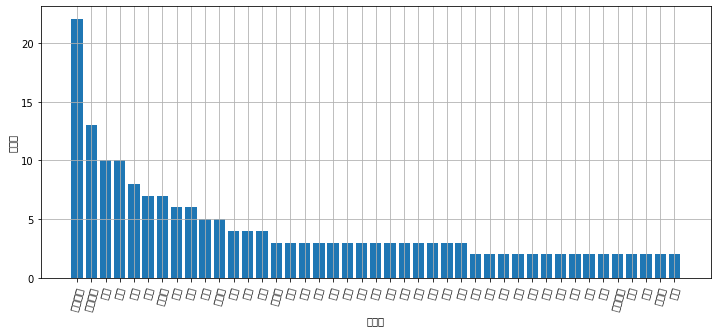

In [19]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_keys = sorted(wordCount, key=count.get, reverse=True)
print(sorted_keys)
sorted_values = sorted(wordCount.values(), reverse=True)
print(sorted_values)
plt.bar(range(len(wordCount)), sorted_values, align = 'center')
plt.xticks(range(len(wordCount)), list(sorted_keys), rotation = '75')
plt.show()

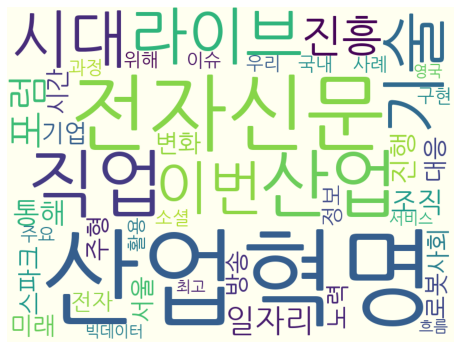

In [20]:
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height=600)
cloud = wc.generate_from_frequencies(wordCount)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()